<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


# About The Dataset


This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [16]:
import pandas as pd
df = pd.read_csv('Weather_Data.csv')
df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,01/09/2024,15.0,27.4,0,6.8,10.9,NNW,46,12:49,20.0,...,1,WNW,9,1012.4,27.2,17,1,NW,24,1008.0
1,02/09/2024,16.5,25.2,0,10.8,10.6,W,80,14:18,22.9,...,0,WNW,30,1008.2,20.9,21,1,W,39,1012.6
2,03/09/2024,10.4,19.9,0,11.0,10.7,W,48,01:39,13.9,...,1,W,20,1029.4,18.2,34,1,ESE,19,1028.7
3,04/09/2024,8.4,21.6,0,6.0,10.5,NNE,43,18:26,15.6,...,5,NNW,17,1029.3,21.4,47,2,NE,22,1023.6
4,05/09/2024,11.6,27.8,0,6.2,6.2,NNW,41,12:13,18.4,...,6,S,2,1024.5,27.6,28,3,NNW,17,1019.2


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [ ]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [ ]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [ ]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [ ]:
df_sydney_processed = df_sydney_processed.astype(float)

In [ ]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


#### Using the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.



In [29]:
from sklearn.model_selection import train_test_split

df_numeric = df.select_dtypes(include=['float64', 'int64'])

X = df_numeric.drop(columns=['Rainfall (mm)'])
y = df_numeric['Rainfall (mm)']

X = X.dropna()

y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape




((19, 15), (5, 15), (19,), (5,))

#### Creating and training a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 6.776636577736163
R-squared: 0.0


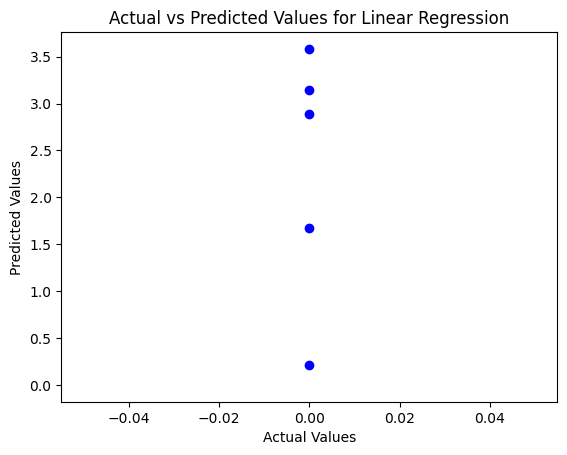

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression')

plt.show()


### KNN


#### Creating and training a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=10)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Mean Squared Error: {mse_tree}')
print(f'Decision Tree R-squared: {r2_tree}')


Decision Tree Mean Squared Error: 0.8
Decision Tree R-squared: 0.0


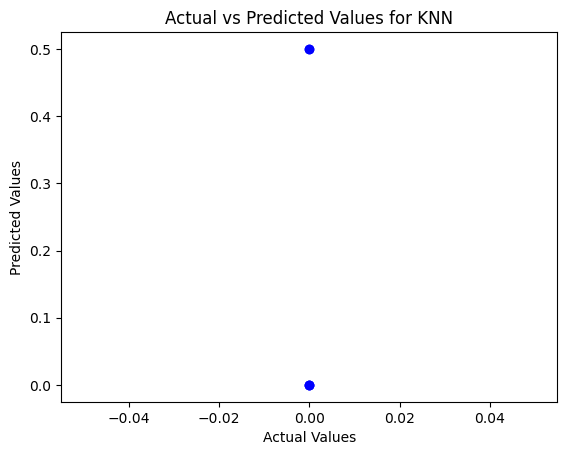

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define and train the KNN model (if not already done)
knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn_model.predict(X_test)

# Scatter plot of actual vs predicted values for KNN
plt.scatter(y_test, y_pred_knn, color='blue')

# Adding a diagonal line that represents perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for KNN')

plt.show()



### Decision Tree


#### Creating and training a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=10)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Mean Squared Error: {mse_tree}')
print(f'Decision Tree R-squared: {r2_tree}')


Decision Tree Mean Squared Error: 0.8
Decision Tree R-squared: 0.0


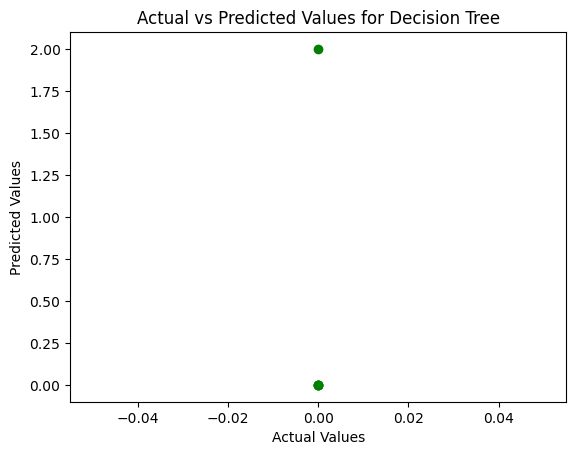

In [38]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values for Decision Tree
plt.scatter(y_test, y_pred_tree, color='green')

# Adding a diagonal line that represents perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Decision Tree')

plt.show()


### SVM


#### Creating and training a SVM model called SVM using the training data (`x_train`, `y_train`).


In [40]:
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'SVM Mean Squared Error: {mse_svm}')
print(f'SVM R-squared: {r2_svm}')


SVM Mean Squared Error: 0.009977285911297411
SVM R-squared: 0.0


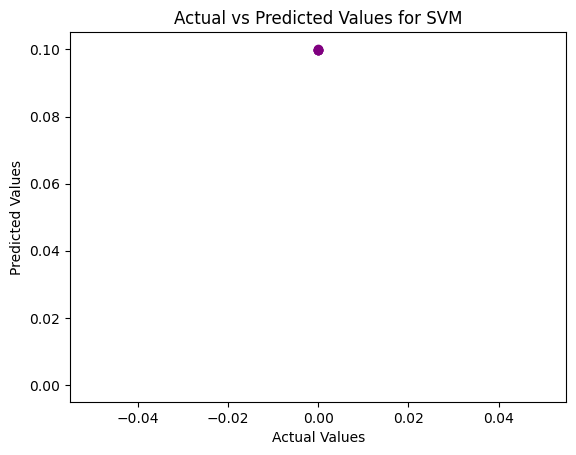

In [42]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_svm, color='purple')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for SVM')

plt.show()


### Report


#### Showing the Accuracy,Jaccard Index and F1-Score in a tabular format using data frame for all of the above models.



In [45]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score
import pandas as pd

# Assuming the models have been trained and predictions are already made
# Define a function to compute metrics for classification models
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, jaccard, f1

# Create an empty list to store the results
results = []

# Logistic Regression
accuracy_logreg, jaccard_logreg, f1_logreg = calculate_metrics(y_test_clf, y_pred_clf)
results.append(['Logistic Regression', accuracy_logreg, jaccard_logreg, f1_logreg])

# KNN
accuracy_knn, jaccard_knn, f1_knn = calculate_metrics(y_test_clf, y_pred_knn)
results.append(['KNN', accuracy_knn, jaccard_knn, f1_knn])

# Decision Tree
accuracy_tree, jaccard_tree, f1_tree = calculate_metrics(y_test_clf, y_pred_tree)
results.append(['Decision Tree', accuracy_tree, jaccard_tree, f1_tree])

# SVM
accuracy_svm, jaccard_svm, f1_svm = calculate_metrics(y_test_clf, y_pred_svm)
results.append(['SVM', accuracy_svm, jaccard_svm, f1_svm])

# Create a DataFrame to display the results
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Jaccard Index', 'F1-Score'])

# Display the results
print(df_results)


<class 'NameError'>: name 'y_test_clf' is not defined

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<!--
## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2022-06-22        | 2.0     | Svitlana K.   | Deleted GridSearch and Mock |
--!>